In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2022-04-07 10:50:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-04-07 10:50:28 (79.6 MB/s) - ‘iris.data’ saved [4551/4551]



In [ ]:
import os

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import seaborn as sns
%matplotlib inline

In [ ]:
!ls

iris.data  sample_data


In [ ]:
data_frame = pd.read_csv('iris.data', names = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class'])
data_frame.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data_frame.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


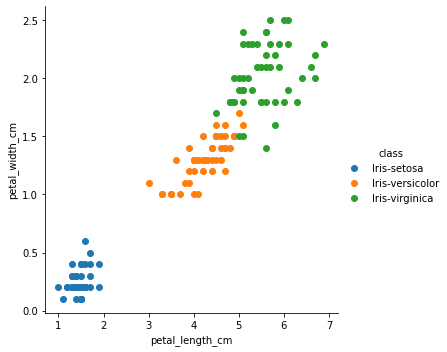

In [ ]:
sns.FacetGrid(data_frame, hue='class', height=5).map(plt.scatter, 'petal_length_cm', 'petal_width_cm').add_legend()

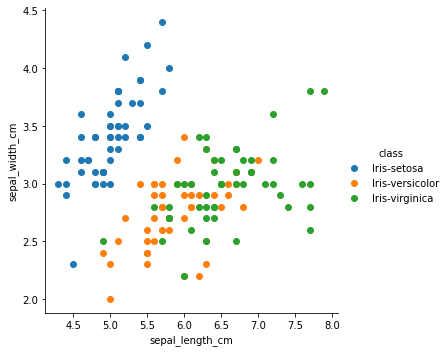

In [ ]:
sns.FacetGrid(data_frame, hue='class', height=5).map(plt.scatter, 'sepal_length_cm', 'sepal_width_cm').add_legend()

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data_frame, test_size=0.40, shuffle=True)

train_data = train.reset_index(drop=True)
test_data = test.reset_index(drop=True)

In [ ]:
#print(test_data)

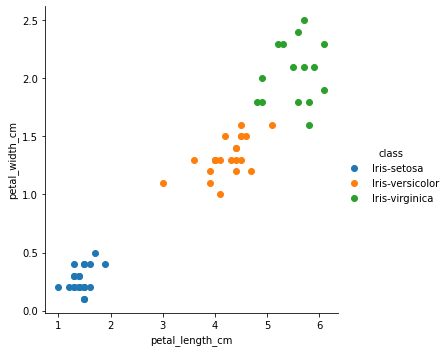

In [ ]:
sns.FacetGrid(test_data, hue='class', height=5).map(plt.scatter, 'petal_length_cm', 'petal_width_cm').add_legend()

In [ ]:
train_data=train_data.drop(['sepal_length_cm','sepal_width_cm'],axis=1)
test_data=test_data.drop(['sepal_length_cm','sepal_width_cm'],axis=1)

In [ ]:
X = np.array(train_data)
y = np.array(test_data)
m= len(test_data)

In [ ]:
def knn(k,y,X,m):
  acc  = 0
  counter = 0 
  for test_sample in y:
    closest = []
    for train_sample in X:
      x=0
      temp = []
      for i in range(0,len(train_sample)-1):
        x=x+((train_sample[i]-test_sample[i])**2)
      temp.append(x)
      temp.append(train_sample[-1])
      closest.append(temp)
    closest.sort()
    z = 0
    for i in range(k):
      if test_sample[-1] == closest[i][1]:
        z = z + 1
    if z > k/2 :
      acc = acc + 1
  print("The accuracy is: ",(acc/m)*100)

In [ ]:
knn(5,y,X,m)

The accuracy is:  98.33333333333333


In [ ]:
Y=(train_data['class'])
Y=np.array(Y)
train_data = train_data.drop(['class'],axis=1)
y_test = (test_data['class'])
y_test =np.array(y_test)
test_data = test_data.drop(['class'],axis=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5)  
classifier.fit(train_data,Y) 

y_pred= classifier.predict(test_data)  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[23  0  0]
 [ 0 21  1]
 [ 0  0 15]]


In [ ]:
acc = 0
for i in range(len(cm)):
  for j in range(len(cm[i])):
    if i!=j and cm[i][j]!=0:
      acc = acc + cm[i][j]

print("The accuracy of sklearn model is:",((m-acc)/m)*100)
      

The accuracy of sklearn model is: 98.33333333333333
